# Physics 260 Final Project
## Simulating Magnetic Fields in Cylinder and Box Magnets to Determine Magnetic Shielding
#### Tex White and Veronica Alfaro
#### 23 April 2019


### Abstract

For this project, we simulated the magnetic fields created within cylindrical and a box-shaped magnets so that the strength and uniformity of the resulting fields could be determined and compared. These magnets were created by running current along the length of an open cylinder and box made of MuMetal, which, for both shapes, resulted in an inner magnetic field with field lines pointing downward along the vertical axis in the space inside the magnet. We want to compare these inner magnetic fields in order to determine the MuMetal's effective magnetic shielding for each shape. A successful magnetic should create a small, stable, uniform magnetic shield in the inner space. In simulating these magnetic fields, we can determine which magnet design is optimal in theory for magnetic shielding, which can be utilized in Neutron Electric Dipole Moment (nEDM) experiments. We simulated these fields by numerically integrating the Biot-Savart Law to determine magnetic field resulting from a current-carrying wire. From our simulated fields, we found that both magnet designs act as effective magnetic shields due to their symmetry in placement of current. However, with further testing, we expect the difference between the two to be more significant as more wires and copper rods are added that create a more complete and accurate field around the MuMetal.

### Introduction and Motivation

This project was motivated by research currently being conducted by Dr. Timothy Chupp in the Department of Physics at the University of Michigan. This portion of his research, titled "Studies of a Magic Cylinder Magnet for a Neutron Electric Dipole Experiment", aims to test a variety of magnet designs besides the cylindrical and box magnets included in this project. In addition to the computer-simulated magnetic fields for these magnets, Dr. Chupp's research team is collecting experimental data by making prototypes of these magnets and using a flux gate capacitor to record the strength of the magnetic fields. The experimental data is then compared to the computer simulations to determine the accuracy of the prototype and models. Dr. Chupp plans to use the results from his research, which magnet design works best as a shield, to aid in Neutron Electric Dipole Moment (nEDM) experiments that utilize ferromagnetic materials such as MuMetal for shielding. 

### Background

#### The Biot-Savart Law
This project heavily relies on the Biot-Savart Law, which calculates the magnetic fields produced by current-carrying wires. The general form of the Biot-Savart Law can be written as
$$
       \mathbf{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int\frac{I\,d\vec{\ell}\times ({\vec{r}-\vec{r}^{\prime})}}{|r-r^\prime|^3}
$$
where $\vec{r}$ is a field point and the integral runs over all of the currents in the wires, whose positions are signified by vector $r^\prime$. In our code, we will evaluate the Biot-Savart Law numerically in order to plot the magnetic field resulting from an arrangement of copper rods with electric current running through. In our code, we can easily identify where the Biot-Savart Law is being applied. For example, in the line of code  
dl_cross_rhat[j] = np.cross(dl[j], r_hat[j], axisb=0)
we can see that the cross product $d\vec{\ell}\times ({\vec{r}-\vec{r}^{\prime})}$ is being calculated with the function np.cross(). We also see that the integration is done with the function np.sum() later on in the code. 


#### Configuration of the Cylinder and Box Magnets
In our simulation, the MuMetal cylinder has a total of 12 copper rods arranged around it, with six running along the outside of the cylinder and six along the inside, with pairs of rods running parallel to each other at the same angle from the center at six different points. The rods are connected by wires on each end of the cylinder, and at one point connect to a DC Power supply to produce a 1 Amp current through the wires and rods. The rods were connected in a way such that on one side of the cylinder, the current through the rods on the inside are pointing into the screen and the current through the rods on the outside are pointing out of the screen. On the other half of the cylinder, the the current through the rods on the inside of the cylinder are pointing out of the screen and the currents through the rods on the outside of the cylinder are pointing into the screen. This creates a magnetic field that is pointing downward along the vertical axis down the middle of the cylinder, similar to a dipole. The cylinder is made of MuMetal, a highly permeable nickel-iron magnetic alloy. This material is often used for shielding sensitive electronics from low-frequency magnetic fields.

#### Magnetic Shielding
Magnetic shielding occurs when a highly-permeable magnetic alloy (such as MuMetal) is used to redirect magnetic fields away from an object or area needing to be shielded from a strong magnetic field. Typically, ferromagnetic materials are used, which are attracted by a magnet, similar to steel or iron. The magnetic shield will pull magnetic fields towards it and thus away from the area in need of shielding. The magnetic field then becomes concentrated within the shield (in our simulation, this would be the MuMetal cylinder/box) but still exists outside of it, just weaker ("Magnetic Shield Corporation FAQs", 2019). The degree at which the magnetic field is weakened in the desired area is called the magnetic attenuation ratio. The higher the attenuation, the lower the magnetic interference in the area being shielded (Grilli, 2019). 


#### Comparing H and B fields

Throughout the course of this class, we have been denoting magnetic fields by $\vec{B}$, the magnetic flux density. In our plots, however, it is more appropriate to be plotting $\vec{H}$, magnetic field intensity, which allows us to express Ampere's Law solely in terms of free current - what we control directly. In contrast, $\vec{B}$ relies on induced currents, which result from a material being magnetized, and we cannot turn them on and off on their own as we can with free current. $\vec{H}$ is defined as follows

$ H\equiv\frac{1}{\mu_0}B-M$

where M is the magnetic dipole moment per unit volume, or magnetization. 
In free space, $M=0$, so we have $\vec B=\mu_0 \vec H$. However, in our MuMetal cylinder and box, we have 

$B=\mu H$ 

where $\mu=\mu_0(1+\chi_m)$ and  $\chi_m=\frac{M}{H}$ (Griffiths, 1989). The value $\mu$ is dependent on material, and for MuMetal we have $\mu=10000$.

As $\vec H$ measures magnetic field strength regardless of the surrounding medium, while $\vec B$ relies on induced current, we decided to plot $\vec H$ as it is more accurate and simplifies our simulations, as it does not require us to calculate induced current in the cylinder and box.

### Setup

For this project, we created arrays which held the information of each of the 12 wires used in the simulation. Looping through each field point, we used the Biot-Savart law in order to calculate a wire's H-field contribution to that point. Then, we looped through all 12 wires and summed up all of the H-field contributions to create 2D cross-sectional plots of the H-field of the box and cylinder shapes. By switching the x, y, and z components of the wires, we were able to create 2 useful cross-sections without changing the way that the code actually calculates the B-Field. The final result of the code is that we have access to the x, y, and z components of the H-field and the total magnitude of the H-Field at each point. Variations of this data were then plotted to describe various aspects of the field.

### Results, iPython Code, and Discussion

### Shape and Magnitude of the Cylindrical H-Field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#SETUP FOR THE CYLINDER
dx = 0.1
xwire = [[0] for i in range(16)]
ywire = [[0] for i in range(16)]
zwire = [[0] for i in range(16)]

x_sep = [[0] for i in range(16)]
y_sep = [[0] for i in range(16)]
z_sep = [[0] for i in range(16)]
r_sep = [[0] for i in range(16)]
r_hat = [[0] for i in range(16)]

## Laying out the coordinates for each of the wires
# All wires have the same x-components 
# There were 16 wires in the original version of this project
# but we now only use 12 to preserve the symmetry
for i in range(16):
    xwire[i] = np.arange(-5, 5, dx)
    
#each wire has unique z-y coordinates -- Layed out in a circle:
for i in np.arange(0, 15, 2):
    ywire[i] = [2*np.cos(i*np.pi/8)]*(len(xwire[i]))
    zwire[i] = [2*np.sin(i*np.pi/8)]*(len(xwire[i]))
for i in np.arange(1, 17, 2):
    ywire[i] = [1.8*np.cos((i-1)*np.pi/8)]*(len(xwire[i]))
    zwire[i] = [1.8*np.sin((i-1)*np.pi/8)]*(len(xwire[i]))
    
dl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#Initialize the 2D arrays for all values required for computation
#Using B, but effectively calculates H everywhere
B_xj = [[0] for i in range(16)]
B_yj = [[0] for i in range(16)]
B_zj = [[0] for i in range(16)]
dB_xj = [[0] for i in range(16)]
dB_yj = [[0] for i in range(16)]
dB_zj = [[0] for i in range(16)]

dl_cross_rhat = [[0] for i in range(16)]     

In [3]:
# Laying out the spatial grid
coord_min, coord_max = -4, 4
#Defines the resolution of the grid
Ngrid = 300
extent = np.linspace(coord_min, coord_max, Ngrid)
y, z = np.meshgrid(extent, extent)
field_shape = y.shape 
#Consolidate the fields to make computation simpler
yfield = np.ravel(y)
zfield = np.ravel(z)
Npoints = np.size(yfield)
#Using real value for Mu_0 since we care about the absolute magnitude of the field
mu_0 = 4e-7*np.pi
I = 1

#Initialize all B-Field values to zero
B_x = np.zeros(Npoints)
B_y = np.zeros(Npoints)
B_z = np.zeros(Npoints)
for i in range(16):
    B_xj[i] = np.zeros(Npoints)
    B_yj[i] = np.zeros(Npoints)
    B_zj[i] = np.zeros(Npoints)   

#Calculates the H-Field at each point on the graph
index = np.arange(Npoints)
for i in index:
    dB_x = 0
    dB_y = 0
    dB_z = 0
    
    #For each point on the graph, calculates the B-Field from all 16 wires
    for j in range(16):
        dB_xj[j] = 0
        dB_yj[j] = 0
        dB_zj[j] = 0
        
        # we are evaluating B in the y-z plane, where x=0
        x_sep[j] = 0 - xwire[j]    
        y_sep[j] = yfield[i] - ywire[j]
        z_sep[j] = zfield[i] - zwire[j]
        r_sep[j] = np.sqrt(x_sep[j]**2 + y_sep[j]**2 + z_sep[j]**2)
        r_hat[j] = np.array([x_sep[j], y_sep[j], z_sep[j]])/r_sep[j]
        
        #Setting the current in each wire to either 0, 1, or -1
        #based on its relative position on the cylinder/box
        if(j == 4 or j == 5 or j == 12 or j == 13):
            dl[j] = 0*np.array([dx,0,0])
        if(j == 3 or j == 1 or j == 15 or j == 8 or j == 6 or j == 10):
            dl[j] = np.array([dx, 0, 0])
        if( j == 7 or j == 9 or j == 11 or j == 0 or j == 2 or j == 14):
            dl[j] = -1*np.array([dx, 0, 0])
            
        dl_cross_rhat[j] = np.cross(dl[j], r_hat[j], axisb=0)

        dB_xj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,0]/r_sep[j]**2
        dB_yj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,1]/r_sep[j]**2
        dB_zj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,2]/r_sep[j]**2
        
        B_xj[j][i] = np.sum(dB_xj[j])     
        B_yj[j][i] = np.sum(dB_yj[j])
        B_zj[j][i] = np.sum(dB_zj[j])
        #Sums up all H-field components for this wire and adds it to previous wires
        B_x[i] += np.sum(dB_xj[j])
        B_y[i] += np.sum(dB_yj[j])
        B_z[i] += np.sum(dB_zj[j])
        
B_x = B_x.reshape(field_shape)
B_y = B_y.reshape(field_shape)
B_z = B_z.reshape(field_shape)
magB = np.sqrt(B_x**2 + B_y**2 + B_z**2)

Text(0.5, 1.0, 'Streamplot of H-field by Wires around Cylinder')

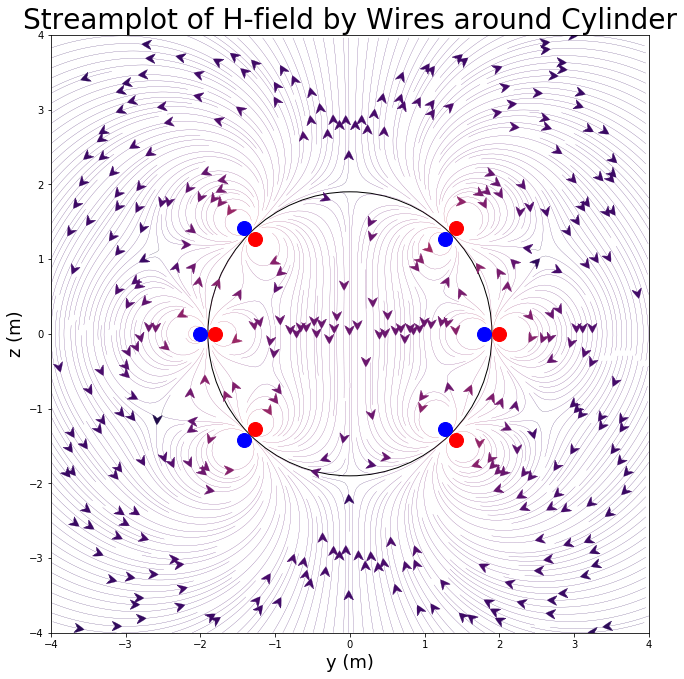

In [4]:
#Streamplot showing magnitude and direction of B-field at all points
fig, ax1 = plt.subplots(1, figsize=(11,11))
color = 2 * np.log(magB)
#Alternate to the current plot style (Thicker and fewer lines)
#ax1.streamplot(y, z, B_y, B_z, color=color, linewidth=3, cmap=plt.cm.inferno,
#              density=1.9, arrowstyle='fancy', arrowsize=3)
ax1.streamplot(y, z, B_y, B_z, color=color, linewidth=0.2, cmap=plt.cm.inferno,
              density=4, arrowstyle='fancy', arrowsize=2.4)

# indicate the locations of all of the active wires (blue out of page, red into page)
markers = 14
ax1.plot(2*np.cos(0*np.pi/4),2*np.sin(0*np.pi/4),'o', markersize=markers, color='r')   
ax1.plot(1.8*np.cos(0*np.pi/4),1.8*np.sin(0*np.pi/4),'o', markersize=markers, color='b')

ax1.plot(2*np.cos(1*np.pi/4),2*np.sin(1*np.pi/4),'o', markersize=markers, color='r')   
ax1.plot(1.8*np.cos(1*np.pi/4),1.8*np.sin(1*np.pi/4),'o', markersize=markers, color='b')

ax1.plot(2*np.cos(7*np.pi/4),2*np.sin(7*np.pi/4),'o', markersize=markers, color='r')   
ax1.plot(1.8*np.cos(7*np.pi/4),1.8*np.sin(7*np.pi/4),'o', markersize=markers, color='b')

ax1.plot(2*np.cos(4*np.pi/4),2*np.sin(4*np.pi/4),'o', markersize=markers, color='b')  
ax1.plot(1.8*np.cos(4*np.pi/4),1.8*np.sin(4*np.pi/4),'o', markersize=markers, color='r')

ax1.plot(2*np.cos(5*np.pi/4),2*np.sin(5*np.pi/4),'o', markersize=markers, color='b')   
ax1.plot(1.8*np.cos(5*np.pi/4),1.8*np.sin(5*np.pi/4),'o', markersize=markers, color='r')

ax1.plot(2*np.cos(3*np.pi/4),2*np.sin(3*np.pi/4),'o', markersize=markers, color='b')   
ax1.plot(1.8*np.cos(3*np.pi/4),1.8*np.sin(3*np.pi/4),'o', markersize=markers, color='r')

#Plot the cylinder
circle = plt.Circle((0, 0), 1.9, color='black', fill=False)
ax1.add_artist(circle)

ax1.set_aspect('equal')
ax1.set_xlim([coord_min,coord_max])
ax1.set_ylim([coord_min,coord_max])
ax1.set_xlabel('y (m)', fontsize=18)
ax1.set_ylabel('z (m)', fontsize=18)
ax1.set_title('Streamplot of H-field by Wires around Cylinder', fontsize=28)

Text(0.5, 1.0, 'Magnitude of H-Field Within Cylinder')

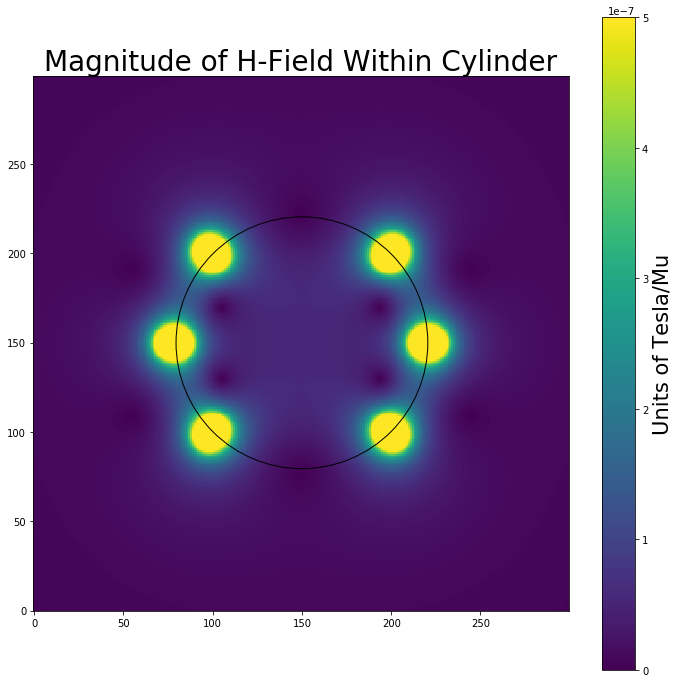

In [5]:
fig, ax = plt.subplots(1, figsize=(12,12))
img = ax.imshow(magB, origin='lower', vmin = 0.0, vmax = 0.0000005)
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Units of Tesla/Mu', fontsize=21, rotation=90)
circle = plt.Circle((150, 150), 70.5, color='black', fill=False)
ax.add_artist(circle)
ax.set_title('Magnitude of H-Field Within Cylinder', fontsize=28)

Text(0.5, 1.0, 'Vertical Component of H-Field relative to Center Within Cylinder')

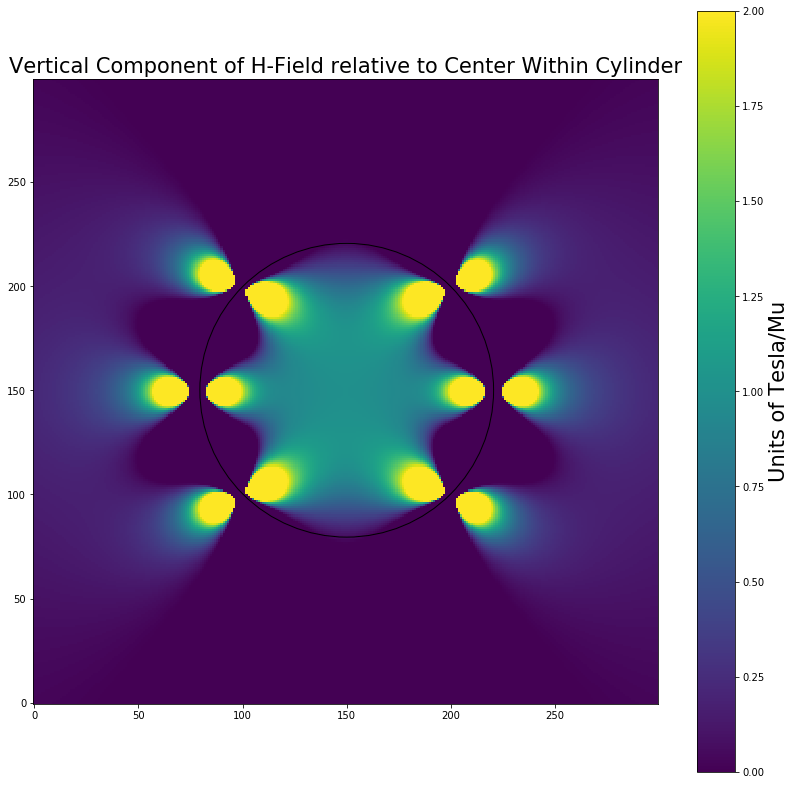

In [6]:
fig, ax = plt.subplots(1, figsize=(14,14))
img = ax.imshow(B_z/B_z[150][150], origin='lower', vmin = 0, vmax = 2)
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Units of Tesla/Mu', fontsize=21, rotation=90)
circle = plt.Circle((150, 150), 70.5, color='black', fill=False)
ax.add_artist(circle)
ax.set_title('Vertical Component of H-Field relative to Center Within Cylinder', fontsize=21)

### Discussion
The first plot shown here is a streamplot showing the direction of the H-field on a cross-section of the cylinder. The red and blue dots show the locations of the wires, with the Blue dots representing wires carrying current out of the page and the red dots carrying current into the page and the circle represents the cross-section of the cylinder itself. The streamplot is successful in showing that the field inside is mostly uniform in direction and pointing vertically downwards. It also simulates how a MuMetal reacts to magnetic field lines, namely it acts similarly to a sponge, pulling the magnetic field lines towards it, which can best be seen at the top and bottom of the streamplot graph.

The second and third plots show the magnitude of the H-field within the cylinder and the relative magnitude of the vertical component of the H-field, respectively. The first of these plots shows that around the wires, the Magnitude of the H-field is relatively large, but within most of the cylinder it is small but non-zero (on the power of $10^{-7}$ ). The second plot divides the vertical component of the H-field at every point by the vertical component of the H-field in the very center of the cylinder. Since the values of this plot are close to $1$ within most of the cylinder, the field is very uniform throughout most of the cylinder. 

### Shape and Magnitude of the Box H-Field

In [7]:
##SETUP FOR BOX
dx = 0.1
xwire = [[0] for i in range(16)]
ywire = [[0] for i in range(16)]
zwire = [[0] for i in range(16)]

x_sep = [[0] for i in range(16)]
y_sep = [[0] for i in range(16)]
z_sep = [[0] for i in range(16)]
r_sep = [[0] for i in range(16)]
r_hat = [[0] for i in range(16)]

## Laying out the coordinates for each of the wires
# All wires have the same x-components 
for i in range(16):
    xwire[i] = np.arange(-5, 5, dx)
    
#each wire has unique z-y coordinates
ywire[0] = [0]*(len(xwire[i]))
zwire[0] = [2]*(len(xwire[i]))

ywire[1] = [0]*(len(xwire[i]))
zwire[1] = [1.8]*(len(xwire[i]))

ywire[2] = [2]*(len(xwire[i]))
zwire[2] = [2]*(len(xwire[i]))

ywire[3] = [1.8]*(len(xwire[i]))
zwire[3] = [1.8]*(len(xwire[i]))

ywire[4] = [2]*(len(xwire[i]))
zwire[4] = [0]*(len(xwire[i]))

ywire[5] = [1.8]*(len(xwire[i]))
zwire[5] = [0]*(len(xwire[i]))

ywire[6] = [-2]*(len(xwire[i]))
zwire[6] = [2]*(len(xwire[i]))

ywire[7] = [-1.8]*(len(xwire[i]))
zwire[7] = [1.8]*(len(xwire[i]))

ywire[8] = [-2]*(len(xwire[i]))
zwire[8] = [0]*(len(xwire[i]))

ywire[9] = [-1.8]*(len(xwire[i]))
zwire[9] = [0]*(len(xwire[i]))

ywire[10] = [-2]*(len(xwire[i]))
zwire[10] = [-2]*(len(xwire[i]))

ywire[11] = [-1.8]*(len(xwire[i]))
zwire[11] = [-1.8]*(len(xwire[i]))

ywire[12] = [0]*(len(xwire[i]))
zwire[12] = [-2]*(len(xwire[i]))

ywire[13] = [0]*(len(xwire[i]))
zwire[13] = [-1.8]*(len(xwire[i]))

ywire[14] = [2]*(len(xwire[i]))
zwire[14] = [-2]*(len(xwire[i]))

ywire[15] = [1.8]*(len(xwire[i]))
zwire[15] = [-1.8]*(len(xwire[i]))

dl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

B_xj = [[0] for i in range(16)]
B_yj = [[0] for i in range(16)]
B_zj = [[0] for i in range(16)]
dB_xj = [[0] for i in range(16)]
dB_yj = [[0] for i in range(16)]
dB_zj = [[0] for i in range(16)]

dl_cross_rhat = [[0] for i in range(16)]     

In [8]:
# Laying out the spatial grid
coord_min, coord_max = -4, 4
#Defines the resolution of the grid
Ngrid = 300
extent = np.linspace(coord_min, coord_max, Ngrid)
y, z = np.meshgrid(extent, extent)
field_shape = y.shape 
#Consolidate the fields to make computation simpler
yfield = np.ravel(y)
zfield = np.ravel(z)
Npoints = np.size(yfield)
#Using real value for Mu_0 since we care about the absolute magnitude of the field
mu_0 = 4e-7*np.pi
I = 1

#Initialize all B-Field values to zero
B_x = np.zeros(Npoints)
B_y = np.zeros(Npoints)
B_z = np.zeros(Npoints)
for i in range(16):
    B_xj[i] = np.zeros(Npoints)
    B_yj[i] = np.zeros(Npoints)
    B_zj[i] = np.zeros(Npoints)   

#Calculates the B-Field at each point on the graph
index = np.arange(Npoints)
for i in index:
    dB_x = 0
    dB_y = 0
    dB_z = 0
    
    #For each point on the graph, calculates the B-Field from all 16 wires
    for j in range(16):
        dB_xj[j] = 0
        dB_yj[j] = 0
        dB_zj[j] = 0
        
        # we are evaluating B in the y-z plane, where x=0
        x_sep[j] = 0 - xwire[j]    
        y_sep[j] = yfield[i] - ywire[j]
        z_sep[j] = zfield[i] - zwire[j]
        r_sep[j] = np.sqrt(x_sep[j]**2 + y_sep[j]**2 + z_sep[j]**2)
        r_hat[j] = np.array([x_sep[j], y_sep[j], z_sep[j]])/r_sep[j]
        
        #Every second wire will have a negative current
        #4, 5, 12, 13
        if(j == 1 or j == 0 or j == 12 or j == 13):
            dl[j] = 0*np.array([dx,0,0])
        if(j == 2 or j == 4 or j == 14 or j == 7 or j == 9 or j == 11):
            dl[j] = -1*np.array([dx, 0, 0])
        if( j == 3 or j == 5 or j == 6 or j == 8 or j == 10 or j == 15):
            dl[j] = np.array([dx, 0, 0])
            
        dl_cross_rhat[j] = np.cross(dl[j], r_hat[j], axisb=0)

        dB_xj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,0]/r_sep[j]**2
        dB_yj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,1]/r_sep[j]**2
        dB_zj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,2]/r_sep[j]**2
        
        B_xj[j][i] = np.sum(dB_xj[j])     
        B_yj[j][i] = np.sum(dB_yj[j])
        B_zj[j][i] = np.sum(dB_zj[j])
        #Sums up all B-field components for this wire and adds it to previous wires
        B_x[i] += np.sum(dB_xj[j])
        B_y[i] += np.sum(dB_yj[j])
        B_z[i] += np.sum(dB_zj[j])
        
B_x = B_x.reshape(field_shape)
B_y = B_y.reshape(field_shape)
B_z = B_z.reshape(field_shape)
magB = np.sqrt(B_x**2 + B_y**2 + B_z**2)

Text(0.5, 1.0, 'Streamplot of H-field by Wires around Box')

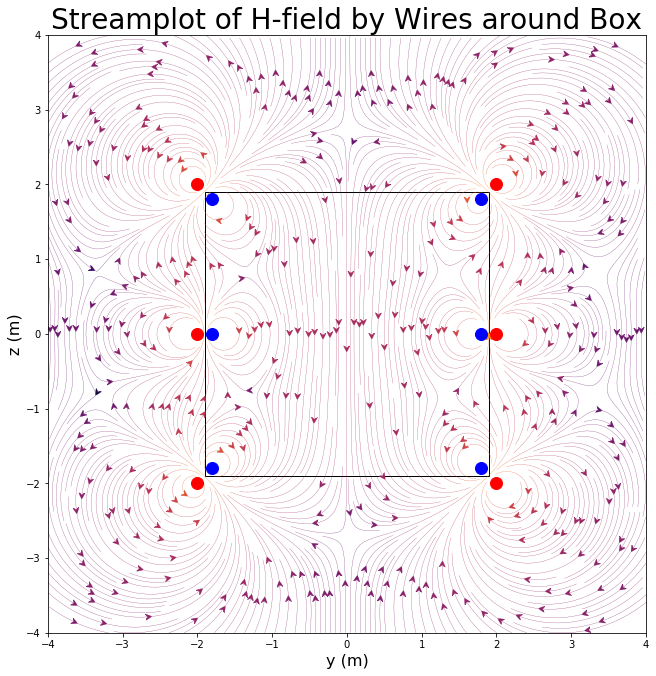

In [9]:
# Plot
fig, ax1 = plt.subplots(1, figsize=(11,11))
color = 2 * np.log(magB)    # colors the arrows based on field strength

#Alternate plot with thicker and fewer field lines (Used for presentation slide)
#ax1.streamplot(y, z, B_y, B_z, color=color, linewidth=3, cmap=plt.cm.inferno,
#              density=1.9, arrowstyle='fancy', arrowsize=3)

ax1.streamplot(y, z, B_y, B_z, color=color, linewidth=0.25, cmap=plt.cm.inferno,
              density=4, arrowstyle='fancy', arrowsize=1.5)
ax1.set_aspect('equal')
ax1.set_xlim([coord_min,coord_max])
ax1.set_ylim([coord_min,coord_max])
ax1.set_xlabel('y (m)', fontsize=16)
ax1.set_ylabel('z (m)', fontsize=16)

#Plots the locations of all the wires except for the original 4 vertical ones
#The first time we did this we have wires at the top and bottom which made it asymmetric but
#we have since gotten rid of them but adjusting the entire code is a lot of work
for i in np.arange(0, 15, 2):
    if (i == 0 or i == 1 or i == 12 or i == 13):
        physicsiscool = True
    else:
        ax1.plot(ywire[i][0],zwire[i][0],'o', markersize=12, color='r')   # indicate the location of the wire
        ax1.plot(ywire[i + 1][0],zwire[i + 1][0],'o', markersize=12, color='b')

#Plot the outline of the box
rect = plt.Rectangle((-1.9, -1.9), 3.8, 3.8, color='black', fill=False)
ax1.add_artist(rect)   
    
ax1.set_title('Streamplot of H-field by Wires around Box', fontsize=28)

Text(0.5, 1.0, 'Magnitude of H-Field Within Box')

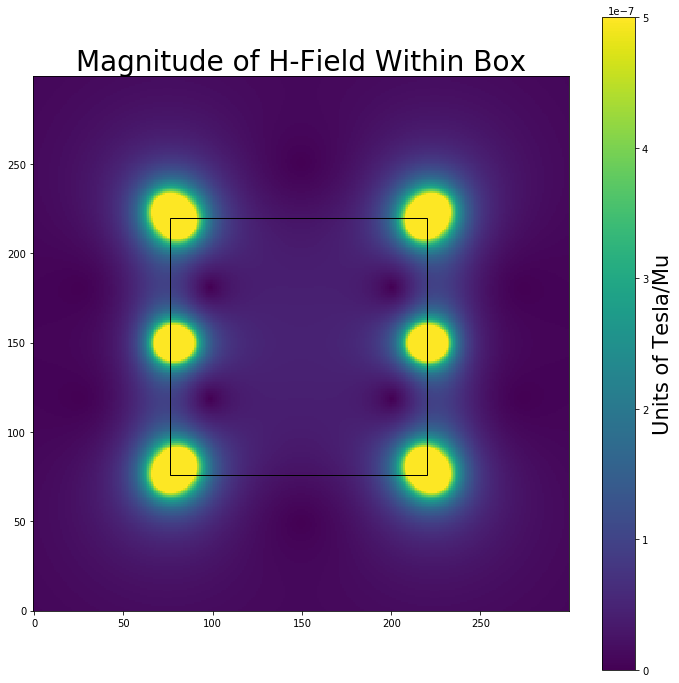

In [10]:
fig, ax = plt.subplots(1, figsize=(12,12))
img = ax.imshow(magB, origin='lower', vmin = 0.0, vmax = 0.0000005)
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Units of Tesla/Mu', fontsize=21, rotation=90)
rect = plt.Rectangle((76, 76), 144, 144, color='black', fill=False)
ax.add_artist(rect) 
ax.set_title('Magnitude of H-Field Within Box', fontsize=28)

Text(0.5, 1.0, 'Vertical Component of H-Field relative to Center Within Box')

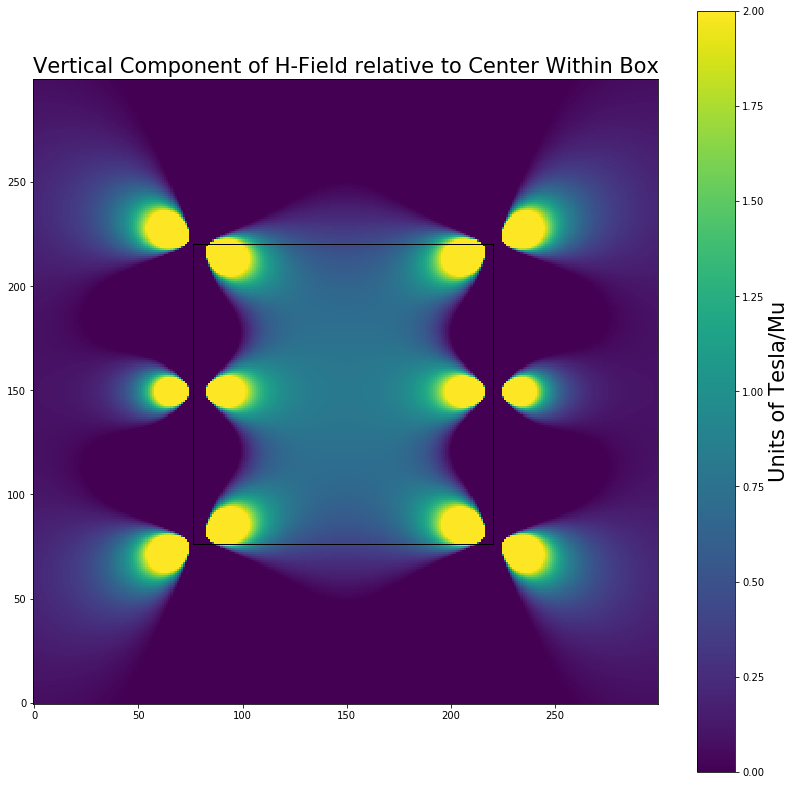

In [11]:
fig, ax = plt.subplots(1, figsize=(14,14))
img = ax.imshow(B_z/B_z[100][100], origin='lower', vmin = 0, vmax = 2)
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Units of Tesla/Mu', fontsize=21, rotation=90)
rect = plt.Rectangle((76, 76), 144, 144, color='black', fill=False)
ax.add_artist(rect) 
ax.set_title('Vertical Component of H-Field relative to Center Within Box', fontsize=21)

### Discussion

The results of the box magnet are very similar to that of the cylinder. The first plot shows a streamplot of the H-field on a cross-section of the box. The blue dots represent wires carrying current out of the page and the red dots represent wires carrying current into the page and the square represents the cross-section of the box itself. Similarly to the cylinder, the streamplot shows a uniform vertical magnetic field shape. The other plots also show that the box magnet pattern is successful in creating a small (magnitude of $10^{-7}$) but uniform magnetic field.

The only significant difference between the cylinder and box fields is that since the box has better horizontal symmetry, the field is more uniform at the top and bottom of the cross-section. This could be significant since in terms of normal day-to-day usage, magnetic shielding with a rectangular prism may be more useful that with a cylinder (creating a shielded room, or a shielded phone/laptop), so the fact that the field is just as uniform as the cylinder is significant.

### Side Cross-Section of Cylinder

In [12]:
dx = 0.1
num = 100
xwire = [[0] for i in range(16)]
ywire = [[0] for i in range(16)]
zwire = [[0] for i in range(16)]

x_sep = [[0] for i in range(16)]
y_sep = [[0] for i in range(16)]
z_sep = [[0] for i in range(16)]
r_sep = [[0] for i in range(16)]
r_hat = [[0] for i in range(16)]

#Reorients the wires so that they are the same wires but the y and x-components are flipped.
#This allows me to use the same code to run the simulation and create the field graphs
for j in range(16):
    indexing = 0
    ywire[j] = [0]*100
    for i in np.arange(-5, 5, dx):
        ywire[j][indexing] = i
        indexing = indexing + 1
    
for i in np.arange(0, 15, 2):
    zwire[i] = [2*np.sin(i*np.pi/8)]*(num)
    xwire[i] = [2*np.cos(i*np.pi/8)]*np.ones(num)
for i in np.arange(1, 17, 2):
    zwire[i] = [1.8*np.sin((i-1)*np.pi/8)]*(num)
    xwire[i] = [2*np.cos(i*np.pi/8)]*np.ones(num)

B_xj = [[0] for i in range(16)]
B_yj = [[0] for i in range(16)]
B_zj = [[0] for i in range(16)]
dB_xj = [[0] for i in range(16)]
dB_yj = [[0] for i in range(16)]
dB_zj = [[0] for i in range(16)]

dl_cross_rhat = [[0] for i in range(16)]     

In [13]:
# Laying out the spatial grid
#Defines the resolution of the grid
Ngrid = 200
#The extent is different for the 'y' (actually x now) and z components since
#the side view of the cross-section is rectangularly shaped, not a circle or square.
extentz = np.linspace(-3, 3, Ngrid)
extenty = np.linspace(-6, 6, Ngrid)
y, z = np.meshgrid(extenty, extentz)
field_shape_y = y.shape 
field_shape_z = z.shape
#Consolidate the fields to make computation simpler
yfield = np.ravel(y)
zfield = np.ravel(z)
Npoints = np.size(yfield)
#Mu_0 can be 1 since we only care about relative field strength values for the streamplots
mu_0 = 1
I = 1

#Initialize all B-Field values to zero
B_x = np.zeros(Npoints)
B_y = np.zeros(Npoints)
B_z = np.zeros(Npoints)
for i in range(16):
    B_xj[i] = np.zeros(Npoints)
    B_yj[i] = np.zeros(Npoints)
    B_zj[i] = np.zeros(Npoints)   

#Calculates the B-Field at each point on the graph
index = np.arange(Npoints)
for i in index:
    dB_x = 0
    dB_y = 0
    dB_z = 0
    
    #For each point on the graph, calculates the B-Field from all 16 wires
    for j in range(16):
        dB_xj[j] = 0
        dB_yj[j] = 0
        dB_zj[j] = 0
        
        # we are evaluating B in the y-z plane, where x=0
        x_sep[j] = 0 - xwire[j]    
        y_sep[j] = yfield[i] - ywire[j]
        z_sep[j] = zfield[i] - zwire[j]
        r_sep[j] = np.sqrt(x_sep[j]**2 + y_sep[j]**2 + z_sep[j]**2)
        r_hat[j] = np.array([x_sep[j], y_sep[j], z_sep[j]])/r_sep[j]
        
        if(j == 4 or j == 5 or j == 12 or j == 13):
            dl[j] = 0*np.array([dx,0,0])
        if(j == 3 or j == 1 or j == 15 or j == 8 or j == 6 or j == 10):
            dl[j] = np.array([dx, 0, 0])
        if( j == 7 or j == 9 or j == 11 or j == 0 or j == 2 or j == 14):
            dl[j] = -1*np.array([dx, 0, 0])
            
        dl_cross_rhat[j] = np.cross(dl[j], r_hat[j], axisb=0)

        dB_xj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,0]/r_sep[j]**2
        dB_yj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,1]/r_sep[j]**2
        dB_zj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,2]/r_sep[j]**2
        
        B_xj[j][i] = np.sum(dB_xj[j])     
        B_yj[j][i] = np.sum(dB_yj[j])
        B_zj[j][i] = np.sum(dB_zj[j])
        #Sums up all B-field components for this wire and adds it to previous wires
        B_x[i] += np.sum(dB_xj[j])
        B_y[i] += np.sum(dB_yj[j])
        B_z[i] += np.sum(dB_zj[j])
        
B_x = B_x.reshape(field_shape_y)
B_y = B_y.reshape(field_shape_y)
B_z = B_z.reshape(field_shape_z)
magB = np.sqrt(B_x**2 + B_y**2 + B_z**2)

Text(0.5, 1.0, 'Streamplot of H-field lengthwise inside Cylinder')

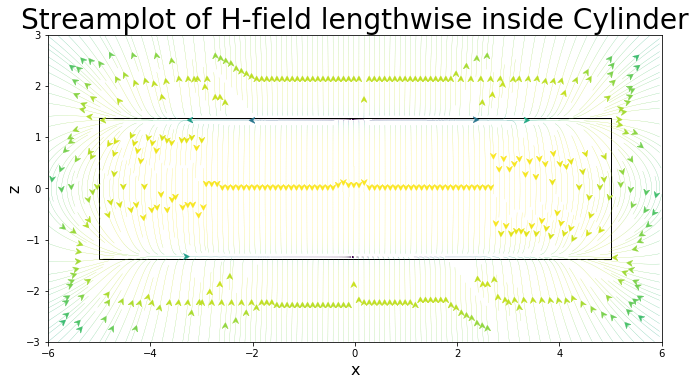

In [14]:
#Plot
fig, ax1 = plt.subplots(1, figsize=(11,11))
# colors the arrows based on field strength
color = 2 * np.log(magB)    

ax1.streamplot(y, z, B_z, -B_y, color=color, linewidth=0.2, cmap=plt.cm.viridis,
              density=4, arrowstyle='fancy', arrowsize=1.5)

#Plot the outline of the box
rect = plt.Rectangle((-5, -1.38), 10, 2.76, color='black', fill=False)
ax1.add_artist(rect)   

ax1.set_aspect('equal')
ax1.set_xlim([-6,6])
ax1.set_ylim([-3,3])
ax1.set_xlabel('x (m)', fontsize=16)
ax1.set_ylabel('z (m)' , fontsize=16)
ax1.set_title('Streamplot of H-field lengthwise inside Cylinder', fontsize=28)

### Discussion

The purpose of the side cross-section of the cylinder and the box is to confirm that the field is consistently vertical throughout the cylinder. The rectangle represents the lengthwise cross-section of the cylinder. The result of this plot does confirm that throughout the cylinder, and most noticeably in the middle, the field is uniformly pointed vertically downwards. The uniformity is lost at the edges of the cylinder and outside of the cylinder, which is to be expected since the symmetry and shielding is lost outside of the cylinder.

### Side Cross-Section of Square

In [15]:
dx = 0.1
num = 100
xwire = [[0] for i in range(16)]
ywire = [[0] for i in range(16)]
zwire = [[0] for i in range(16)]

x_sep = [[0] for i in range(16)]
y_sep = [[0] for i in range(16)]
z_sep = [[0] for i in range(16)]
r_sep = [[0] for i in range(16)]
r_hat = [[0] for i in range(16)]

for j in range(16):
    indexing = 0
    ywire[j] = [0]*100
    for i in np.arange(-5, 5, dx):
        ywire[j][indexing] = i
        indexing = indexing + 1
    
#each wire has unique z-y coordinates
xwire[0] = [0]*np.ones(num)
zwire[0] = [2]*(num)

xwire[1] = [0]*np.ones(num)
zwire[1] = [1.8]*(num)

xwire[2] = [2]*np.ones(num)
zwire[2] = [2]*(num)

xwire[3] = [1.8]*np.ones(num)
zwire[3] = [1.8]*(num)

xwire[4] = [2]*np.ones(num)
zwire[4] = [0]*(num)

xwire[5] = [1.8]*np.ones(num)
zwire[5] = [0]*(num)

xwire[6] = [-2]*np.ones(num)
zwire[6] = [2]*(num)

xwire[7] = [-1.8]*np.ones(num)
zwire[7] = [1.8]*(num)

xwire[8] = [-2]*np.ones(num)
zwire[8] = [0]*(num)

xwire[9] = [-1.8]*np.ones(num)
zwire[9] = [0]*(num)

xwire[10] = [-2]*np.ones(num)
zwire[10] = [-2]*(num)

xwire[11] = [-1.8]*np.ones(num)
zwire[11] = [-1.8]*(num)

xwire[12] = [0]*np.ones(num)
zwire[12] = [-2]*(num)

xwire[13] = [0]*np.ones(num)
zwire[13] = [-1.8]*(num)

xwire[14] = [2]*np.ones(num)
zwire[14] = [-2]*(num)

xwire[15] = [1.8]*np.ones(num)
zwire[15] = [-1.8]*(num)

B_xj = [[0] for i in range(16)]
B_yj = [[0] for i in range(16)]
B_zj = [[0] for i in range(16)]
dB_xj = [[0] for i in range(16)]
dB_yj = [[0] for i in range(16)]
dB_zj = [[0] for i in range(16)]

dl_cross_rhat = [[0] for i in range(16)]     

In [16]:
# Laying out the spatial grid
coord_min, coord_max = -4, 4
#Defines the resolution of the grid
Ngrid = 200
extent = np.linspace(coord_min, coord_max, Ngrid)
extentz = np.linspace(-3, 3, Ngrid)
extenty = np.linspace(-6, 6, Ngrid)
y, z = np.meshgrid(extenty, extentz)
field_shape_y = y.shape
field_shape_z = z.shape
#Consolidate the fields to make computation simpler
yfield = np.ravel(y)
zfield = np.ravel(z)
Npoints = np.size(yfield)
#Mu_0 can be 1 since we only care about relative field strength values
mu_0 = 1
I = 1

#Initialize all B-Field values to zero
B_x = np.zeros(Npoints)
B_y = np.zeros(Npoints)
B_z = np.zeros(Npoints)
for i in range(16):
    B_xj[i] = np.zeros(Npoints)
    B_yj[i] = np.zeros(Npoints)
    B_zj[i] = np.zeros(Npoints)   

#Calculates the B-Field at each point on the graph
index = np.arange(Npoints)
for i in index:
    dB_x = 0
    dB_y = 0
    dB_z = 0
    
    #For each point on the graph, calculates the B-Field from all 16 wires
    for j in range(16):
        dB_xj[j] = 0
        dB_yj[j] = 0
        dB_zj[j] = 0
        
        # we are evaluating B in the y-z plane, where x=0
        x_sep[j] = 0 - xwire[j]    
        y_sep[j] = yfield[i] - ywire[j]
        z_sep[j] = zfield[i] - zwire[j]
        r_sep[j] = np.sqrt(x_sep[j]**2 + y_sep[j]**2 + z_sep[j]**2)
        r_hat[j] = np.array([x_sep[j], y_sep[j], z_sep[j]])/r_sep[j]
        
        if(j == 4 or j == 5 or j == 12 or j == 13):
            dl[j] = 0*np.array([dx,0,0])
        if(j == 3 or j == 1 or j == 15 or j == 8 or j == 6 or j == 10):
            dl[j] = np.array([dx, 0, 0])
        if( j == 7 or j == 9 or j == 11 or j == 0 or j == 2 or j == 14):
            dl[j] = -1*np.array([dx, 0, 0])
            
        dl_cross_rhat[j] = np.cross(dl[j], r_hat[j], axisb=0)

        dB_xj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,0]/r_sep[j]**2
        dB_yj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,1]/r_sep[j]**2
        dB_zj[j] += mu_0/(4*np.pi)*I*dl_cross_rhat[j][:,2]/r_sep[j]**2
        
        B_xj[j][i] = np.sum(dB_xj[j])     
        B_yj[j][i] = np.sum(dB_yj[j])
        B_zj[j][i] = np.sum(dB_zj[j])
        #Sums up all B-field components for this wire and adds it to previous wires
        B_x[i] += np.sum(dB_xj[j])
        B_y[i] += np.sum(dB_yj[j])
        B_z[i] += np.sum(dB_zj[j])
        
B_x = B_x.reshape(field_shape_y)
B_y = B_y.reshape(field_shape_y)
B_z = B_z.reshape(field_shape_z)
magB = np.sqrt(B_x**2 + B_y**2 + B_z**2)

Text(0.5, 1.0, 'Streamplot of H-field lengthwise inside Box')

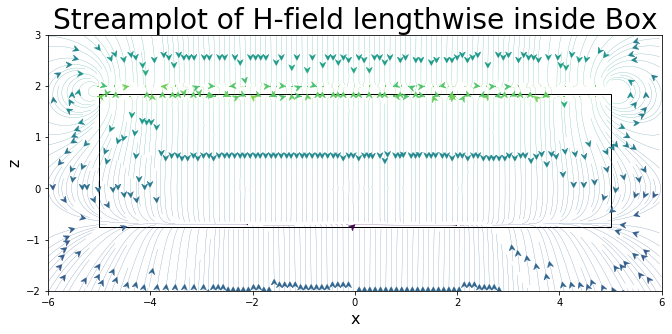

In [17]:
# Make some plots
fig, ax1 = plt.subplots(1, figsize=(11,11))
color = 2 * np.log(magB)    # colors the arrows based on field strength

ax1.streamplot(y, z, B_z, -B_y, color=color, linewidth=0.2, cmap=plt.cm.viridis,
              density=4, arrowstyle='fancy', arrowsize=1.5)

#Plot the outline of the box
rect = plt.Rectangle((-5, -0.75), 10, 2.6, color='black', fill=False)
ax1.add_artist(rect)   

ax1.set_aspect('equal')
ax1.set_xlim([-6,6])
ax1.set_ylim([-2,3])
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('z', fontsize=16)
ax1.set_title('Streamplot of H-field lengthwise inside Box', fontsize=28)

### Discussion

In this plot, the rectangle represents the lengthwise cross-section of the box magnet. Like the previous plot, this plot confirms that the magnetic field is uniformly pointed vertically downwards throughout the entire box. Additionally, the uniformity is still lost at the edge of the box, which could both be a result of coding inaccuracies and the fact that the symmetry of the field is lost outside of the box.

## Final Discussion

The overall results of the data from the project are that both the box and cylinder create small, uniform magnetic fields oriented vertically downwards throughout the shielded area. There were no significant differences between the fields created within the box or the cylinder, which can be explained by both shapes having similar symmetries.

#### Applications and Future Work

There are many ways in which we could expand on this project. For the research related to this project that is currently being conducted, the team is currently testing the cylindrical magnet with 36 current-carrying rods connected aroud the it. Next, they plan to make a prototype for the box magnet and take data for the magnetic fields inside.

Given more time, we could have simulated magnetic fields with more current-carrying copper rods to determine the effect on the uniformity and magnitude of the magnetic field. Additionally, we could test other designs, such as the two layered shield. This design is especially useful for a high flux density field that is too strong for the MuMetal, which causes the shield to saturate. In this case, the outer layer will dilute the magnetic interference, and the second inner layer will absorb the remaining magnetic flux (Grilli, 2019), effectively redirecting the magnetic field away from the area being shielded.

#### References

1. Griffiths, Daniel J. “Chapter 6 Magnetostatic Fields in Matter.” Introduction to Electrodynamics, Second ed., Prentice-Hall, Inc., Englewood Cliffs, New Jersey, 1989, pp. 245–269.

2. Grilli, David. “How Magnetic Shielding Works.” MuShield, 2019, www.mushield.com/magnetic-shielding/how-magnetic-shielding-works/.

3. “Magnetic Shield Corporation FAQs.” Magnetic Shield Corporation, 2019, www.magnetic-shield.com/pdf/magnetic_fields_shields_overview.pdf.

